# 第 3 章　使用 Pyhton 进行数据分析｜用 Python 动手学统计学

## 第 6 节　正态分布及其应用

### 1. 导入函数库

In [1]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

### 2. 实现：概率密度

In [2]:
# 圆周率
sp.pi

3.142

In [3]:
# 指数函数
sp.exp(1)

2.718

In [4]:
# 均值为 4 标准差为 0.8 的正态分布在随机变量为 3 时的概率密度
x = 3
mu = 4
sigma = 0.8

1 / (sp.sqrt(2 * sp.pi * sigma**2)) * \
    sp.exp(- ((x - mu)**2) / (2 * sigma**2))

0.228

In [5]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.228

In [6]:
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.228

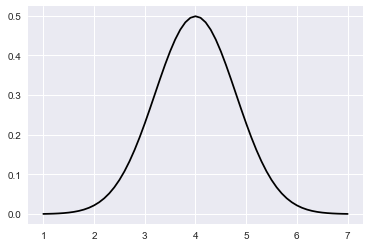

In [7]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot, 
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'black'
)

### 3. 样本小于等于某值的比例

In [8]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([ 5.299,  3.511,  3.577, ...,  4.065,  4.275,  3.402])

In [10]:
sp.sum(simulated_sample <= 3)

10371

In [11]:
sp.sum(simulated_sample <= 3) / len(simulated_sample)

0.104

### 5. 实现：累积分布函数

In [12]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.106

In [13]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.500

### 7. 实现：百分位数

In [14]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.432

In [15]:
left = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = left)

3.000

In [16]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.000

### 10. t 值的样本分布

In [17]:
# 随机数种子
np.random.seed(1)
# 存放 t 值的空间
t_value_array = np.zeros(10000)
# 实例化一个正态分布
norm_dist = stats.norm(loc = 4, scale = 0.8)
# 开始实验
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

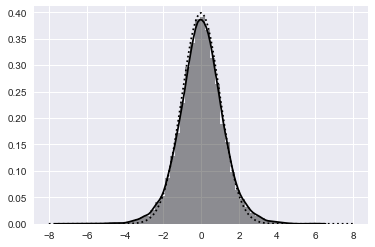

In [18]:
# t 值的直方图
sns.distplot(t_value_array, color = 'black')

# 标准正态分布的概率祺
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'black', linestyle = 'dotted')

### 12. 实现：t 分布

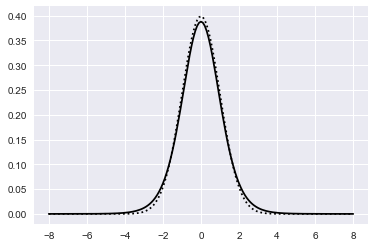

In [19]:
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'black', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black')

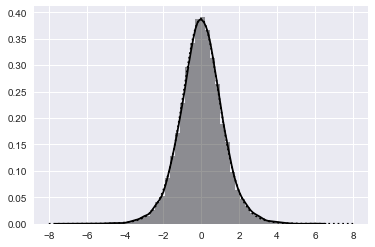

In [20]:
sns.distplot(t_value_array, 
             color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black', linestyle = 'dotted')